##**MAA** 622

In [261]:
# Dùng thư viện yfinance để tải dataset
import pandas as pd

data =pd.read_csv('MAA.csv', index_col='Date')
data

,Close,Open,High,Low,Vol,Change%
Date,,,,,,
2/1/2015,76.15,74.47,76.19,74.47,276.36K,1.97%
5/1/2015,75.86,75.86,76.34,75.43,549.69K,-0.38%
6/1/2015,77.18,76.28,77.83,76.27,833.74K,1.74%
7/1/2015,78.14,76.48,78.34,76.29,544.77K,1.24%
8/1/2015,78.34,78.14,78.46,77.36,544.03K,0.26%
...,...,...,...,...,...,...
12/6/2023,152.73,153.97,153.97,151.50,489.48K,-1.00%
13/06/2023,153.68,151.82,153.78,151.28,513.48K,0.62%
14/06/2023,153.40,154.35,155.11,152.47,388.42K,-0.18%


In [262]:
# Chuyển đổi hàm để xử lý chuỗi 'Vol.'
def convert_vol(value):
    if 'K' in value:
        # Loại bỏ ký tự 'K' và chuyển đổi thành giá trị số
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        # Loại bỏ ký tự 'M' và chuyển đổi thành giá trị số
        return float(value.replace('M', '')) * 1000000
    else:
        # Trường hợp không có đơn vị, giữ nguyên giá trị
        return float(value)

# Áp dụng hàm chuyển đổi vào cột 'Vol.' của dataset
data['Vol'] = data['Vol'].apply(convert_vol)

# Chuyển đổi hàm để xử lý chuỗi 'Change %'
def convert_change(value):
    # Loại bỏ ký tự '%' và chuyển đổi thành giá trị số
    return float(value.replace('%', ''))

# Áp dụng hàm chuyển đổi bằng phương pháp map
data['Change%'] = data['Change%'].map(convert_change)
data

,Close,Open,High,Low,Vol,Change%
Date,,,,,,
2/1/2015,76.15,74.47,76.19,74.47,276360.0,1.97
5/1/2015,75.86,75.86,76.34,75.43,549690.0,-0.38
6/1/2015,77.18,76.28,77.83,76.27,833740.0,1.74
7/1/2015,78.14,76.48,78.34,76.29,544770.0,1.24
8/1/2015,78.34,78.14,78.46,77.36,544030.0,0.26
...,...,...,...,...,...,...
12/6/2023,152.73,153.97,153.97,151.50,489480.0,-1.00
13/06/2023,153.68,151.82,153.78,151.28,513480.0,0.62
14/06/2023,153.40,154.35,155.11,152.47,388420.0,-0.18


In [263]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [264]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df=data
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [265]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [266]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3908.150, Time=4.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3903.412, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3905.327, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3905.326, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3903.711, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3906.975, Time=1.27 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 6.699 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [267]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [268]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[136.62735893 136.67471787 136.7220768  136.76943574 136.81679467
 136.86415361 136.91151254 136.95887147 137.00623041 137.05358934
 137.10094828 137.14830721 137.19566614 137.24302508 137.29038401
 137.33774295 137.38510188 137.43246082 137.47981975 137.52717868
 137.57453762 137.62189655 137.66925549 137.71661442 137.76397335
 137.81133229 137.85869122 137.90605016 137.95340909 138.00076803]


In [269]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mae = np.mean(np.abs(y_pred - y_test))
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
valid_mape = np.mean(np.abs((y_val - y_pred_val) / np.where(y_val != 0, y_val, 1))) * 100


print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Validation RMSE: 42.828688241455644
Testing RMSE: 24.054263078123313
Testing MAE: 21.463136806195756
Validation MAE: 32.81200520508406
Testing MAPE: 16.438604178865155
Validation MAPE: 16.78046123199627


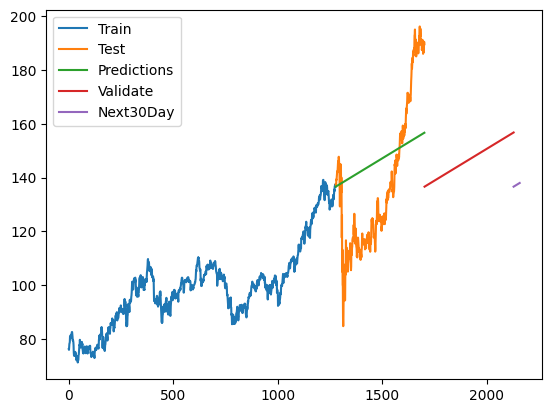

In [270]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [271]:
test_data.index

RangeIndex(start=1277, stop=1702, step=1)

## ARE 622


In [272]:
# Dùng thư viện yfinance để tải dataset
import pandas as pd

data =pd.read_csv('ARE.csv', index_col='Date')
data

,Close,Open,High,Low,Vol,Change%
Date,,,,,,
2/1/2015,89.79,89.11,89.88,88.54,277.62K,1.18%
5/1/2015,90.87,89.31,91.17,89.15,359.76K,1.20%
6/1/2015,91.33,90.65,91.56,90.25,1.33M,0.51%
7/1/2015,92.57,91.55,92.57,90.69,543.40K,1.36%
8/1/2015,93.63,92.57,93.85,92.43,718.78K,1.15%
...,...,...,...,...,...,...
12/6/2023,121.00,120.28,121.71,120.03,788.83K,0.34%
13/06/2023,122.06,121.15,123.93,120.50,846.11K,0.88%
14/06/2023,121.92,122.99,123.79,120.83,1.01M,-0.11%


In [273]:
# Chuyển đổi hàm để xử lý chuỗi 'Vol.'
def convert_vol(value):
    if 'K' in value:
        # Loại bỏ ký tự 'K' và chuyển đổi thành giá trị số
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        # Loại bỏ ký tự 'M' và chuyển đổi thành giá trị số
        return float(value.replace('M', '')) * 1000000
    else:
        # Trường hợp không có đơn vị, giữ nguyên giá trị
        return float(value)

# Áp dụng hàm chuyển đổi vào cột 'Vol.' của dataset
data['Vol'] = data['Vol'].apply(convert_vol)

# Chuyển đổi hàm để xử lý chuỗi 'Change %'
def convert_change(value):
    # Loại bỏ ký tự '%' và chuyển đổi thành giá trị số
    return float(value.replace('%', ''))

# Áp dụng hàm chuyển đổi bằng phương pháp map
data['Change%'] = data['Change%'].map(convert_change)
data

,Close,Open,High,Low,Vol,Change%
Date,,,,,,
2/1/2015,89.79,89.11,89.88,88.54,277620.0,1.18
5/1/2015,90.87,89.31,91.17,89.15,359760.0,1.20
6/1/2015,91.33,90.65,91.56,90.25,1330000.0,0.51
7/1/2015,92.57,91.55,92.57,90.69,543400.0,1.36
8/1/2015,93.63,92.57,93.85,92.43,718780.0,1.15
...,...,...,...,...,...,...
12/6/2023,121.00,120.28,121.71,120.03,788830.0,0.34
13/06/2023,122.06,121.15,123.93,120.50,846110.0,0.88
14/06/2023,121.92,122.99,123.79,120.83,1010000.0,-0.11


In [274]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [275]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df=data
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [276]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [277]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4350.412, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4351.035, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4350.985, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4350.889, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4347.946, Time=2.75 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4346.612, Time=2.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4352.586, Time=0.68 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4345.608, Time=2.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4353.838, Time=0.57 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=4338.000, Time=2.26 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=4340.270, Time=1.11 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=4339.637, Time=3.86 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=4336.504, Time=4.87 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : 

ARIMA(order=(3, 1, 4), scoring_args={}, suppress_warnings=True)

In [278]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [279]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[164.54792346 164.75294921 164.49217337 164.66225232 164.67477244
 164.58567645 164.76034685 164.70038323 164.74856087 164.84912875
 164.81356991 164.915675   164.95511701 164.97501614 165.07039738
 165.09045747 165.15072552 165.21986836 165.25013096 165.32375823
 165.37405829 165.42215222 165.49138554 165.53687375 165.59673341
 165.65705048 165.70655204 165.76951944 165.82417686 165.87936573]


In [280]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mae = np.mean(np.abs(y_pred - y_test))
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
valid_mape = np.mean(np.abs((y_val - y_pred_val) / np.where(y_val != 0, y_val, 1))) * 100


print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)


Validation RMSE: 39.16434359561741
Testing RMSE: 13.510992053256707
Testing MAE: 10.931660934107036
Validation MAE: 35.147218268816395
Testing MAPE: 6.7466507915472596
Validation MAPE: 23.464491738670738


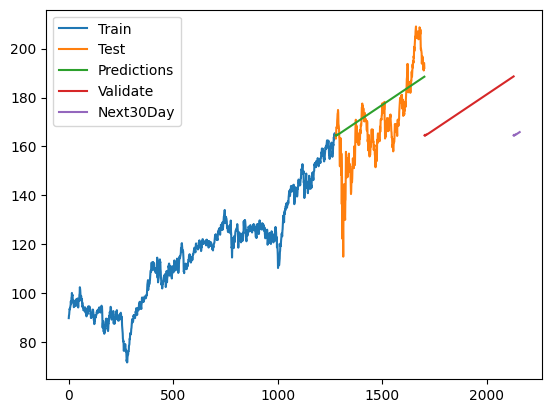

In [281]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [282]:
test_data.index

RangeIndex(start=1277, stop=1702, step=1)

## **ARI** 622


In [283]:
# Dùng thư viện yfinance để tải dataset
import pandas as pd

data =pd.read_csv('ARI.csv', index_col='Date')
data

,Close,Open,High,Low,Vol,Change%
Date,,,,,,
2/1/2015,16.54,16.49,16.55,16.35,184.56K,1.10%
5/1/2015,16.51,16.47,16.63,16.45,387.43K,-0.18%
6/1/2015,16.42,16.60,16.64,16.37,225.81K,-0.55%
7/1/2015,16.63,16.48,16.65,16.44,492.81K,1.28%
8/1/2015,16.49,16.69,16.69,16.45,440.70K,-0.84%
...,...,...,...,...,...,...
12/6/2023,11.09,10.83,11.11,10.83,754.88K,2.21%
13/06/2023,11.22,11.12,11.25,11.08,799.04K,1.17%
14/06/2023,11.19,11.27,11.38,11.09,876.19K,-0.27%


In [284]:
# Chuyển đổi hàm để xử lý chuỗi 'Vol.'
def convert_vol(value):
    if 'K' in value:
        # Loại bỏ ký tự 'K' và chuyển đổi thành giá trị số
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        # Loại bỏ ký tự 'M' và chuyển đổi thành giá trị số
        return float(value.replace('M', '')) * 1000000
    else:
        # Trường hợp không có đơn vị, giữ nguyên giá trị
        return float(value)

# Áp dụng hàm chuyển đổi vào cột 'Vol.' của dataset
data['Vol'] = data['Vol'].apply(convert_vol)

# Chuyển đổi hàm để xử lý chuỗi 'Change %'
def convert_change(value):
    # Loại bỏ ký tự '%' và chuyển đổi thành giá trị số
    return float(value.replace('%', ''))

# Áp dụng hàm chuyển đổi bằng phương pháp map
data['Change%'] = data['Change%'].map(convert_change)
data

,Close,Open,High,Low,Vol,Change%
Date,,,,,,
2/1/2015,16.54,16.49,16.55,16.35,184560.0,1.10
5/1/2015,16.51,16.47,16.63,16.45,387430.0,-0.18
6/1/2015,16.42,16.60,16.64,16.37,225810.0,-0.55
7/1/2015,16.63,16.48,16.65,16.44,492810.0,1.28
8/1/2015,16.49,16.69,16.69,16.45,440700.0,-0.84
...,...,...,...,...,...,...
12/6/2023,11.09,10.83,11.11,10.83,754880.0,2.21
13/06/2023,11.22,11.12,11.25,11.08,799040.0,1.17
14/06/2023,11.19,11.27,11.38,11.09,876190.0,-0.27


In [285]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [286]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df=data
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [287]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [288]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1034.750, Time=3.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1025.607, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1023.618, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1023.619, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1027.507, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1037.599, Time=5.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1022.138, Time=0.88 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1038.645, Time=4.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1037.628, Time=5.65 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1022.071, Time=0.56 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1040.029, Time=0.93 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1025.518, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1025.517, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1039.075, Time=1.96 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [289]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [290]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[18.37236341 18.37456264 18.37660909 18.37851338 18.38028539 18.38193429
 18.38346864 18.38489641 18.38622499 18.38746128 18.38861169 18.38968218
 18.3906783  18.39160522 18.39246775 18.39327037 18.39401723 18.3947122
 18.39535889 18.39596067 18.39652063 18.3970417  18.39752657 18.39797775
 18.3983976  18.39878827 18.39915181 18.39949009 18.39980488 18.40009779]


In [291]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mae = np.mean(np.abs(y_pred - y_test))
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
valid_mape = np.mean(np.abs((y_val - y_pred_val) / np.where(y_val != 0, y_val, 1))) * 100


print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)


Validation RMSE: 6.667131782332331
Testing RMSE: 7.0149722100445455
Testing MAE: 6.221694595125976
Validation MAE: 6.439511524985573
Testing MAPE: 63.252790604526346
Validation MAPE: 57.176165264483316


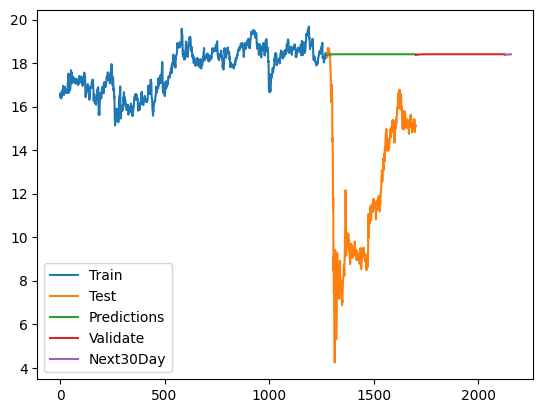

In [292]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [293]:
test_data.index

RangeIndex(start=1277, stop=1702, step=1)

##**MAA** 721

In [294]:
# Dùng thư viện yfinance để tải dataset
import pandas as pd

data =pd.read_csv('MAA.csv', index_col='Date')
data

,Close,Open,High,Low,Vol,Change%
Date,,,,,,
2/1/2015,76.15,74.47,76.19,74.47,276.36K,1.97%
5/1/2015,75.86,75.86,76.34,75.43,549.69K,-0.38%
6/1/2015,77.18,76.28,77.83,76.27,833.74K,1.74%
7/1/2015,78.14,76.48,78.34,76.29,544.77K,1.24%
8/1/2015,78.34,78.14,78.46,77.36,544.03K,0.26%
...,...,...,...,...,...,...
12/6/2023,152.73,153.97,153.97,151.50,489.48K,-1.00%
13/06/2023,153.68,151.82,153.78,151.28,513.48K,0.62%
14/06/2023,153.40,154.35,155.11,152.47,388.42K,-0.18%


In [295]:
# Chuyển đổi hàm để xử lý chuỗi 'Vol.'
def convert_vol(value):
    if 'K' in value:
        # Loại bỏ ký tự 'K' và chuyển đổi thành giá trị số
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        # Loại bỏ ký tự 'M' và chuyển đổi thành giá trị số
        return float(value.replace('M', '')) * 1000000
    else:
        # Trường hợp không có đơn vị, giữ nguyên giá trị
        return float(value)

# Áp dụng hàm chuyển đổi vào cột 'Vol.' của dataset
data['Vol'] = data['Vol'].apply(convert_vol)

# Chuyển đổi hàm để xử lý chuỗi 'Change %'
def convert_change(value):
    # Loại bỏ ký tự '%' và chuyển đổi thành giá trị số
    return float(value.replace('%', ''))

# Áp dụng hàm chuyển đổi bằng phương pháp map
data['Change%'] = data['Change%'].map(convert_change)
data

,Close,Open,High,Low,Vol,Change%
Date,,,,,,
2/1/2015,76.15,74.47,76.19,74.47,276360.0,1.97
5/1/2015,75.86,75.86,76.34,75.43,549690.0,-0.38
6/1/2015,77.18,76.28,77.83,76.27,833740.0,1.74
7/1/2015,78.14,76.48,78.34,76.29,544770.0,1.24
8/1/2015,78.34,78.14,78.46,77.36,544030.0,0.26
...,...,...,...,...,...,...
12/6/2023,152.73,153.97,153.97,151.50,489480.0,-1.00
13/06/2023,153.68,151.82,153.78,151.28,513480.0,0.62
14/06/2023,153.40,154.35,155.11,152.47,388420.0,-0.18


In [296]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [297]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df=data
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [298]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [299]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5775.114, Time=1.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5835.034, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5822.925, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5826.228, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5833.570, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5783.078, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5792.842, Time=0.66 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5777.081, Time=1.37 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5775.469, Time=5.89 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5810.993, Time=1.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5772.317, Time=3.97 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5781.285, Time=0.81 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=5772.647, Time=2.58 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5782.745, Time=0.74 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept

ARIMA(order=(0, 1, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [300]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [301]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[125.08262051 124.92397058 124.80386617 124.90161443 124.90161443
 124.90161443 124.90161443 124.90161443 124.90161443 124.90161443
 124.90161443 124.90161443 124.90161443 124.90161443 124.90161443
 124.90161443 124.90161443 124.90161443 124.90161443 124.90161443
 124.90161443 124.90161443 124.90161443 124.90161443 124.90161443
 124.90161443 124.90161443 124.90161443 124.90161443 124.90161443]


In [302]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mae = np.mean(np.abs(y_pred - y_test))
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
valid_mape = np.mean(np.abs((y_val - y_pred_val) / np.where(y_val != 0, y_val, 1))) * 100


print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)


Validation RMSE: 34.12793416948769
Testing RMSE: 60.26491452469536
Testing MAE: 53.09734013098482
Validation MAE: 32.687471487848775
Testing MAPE: 27.827760456566253
Validation MAPE: 20.449998950122083


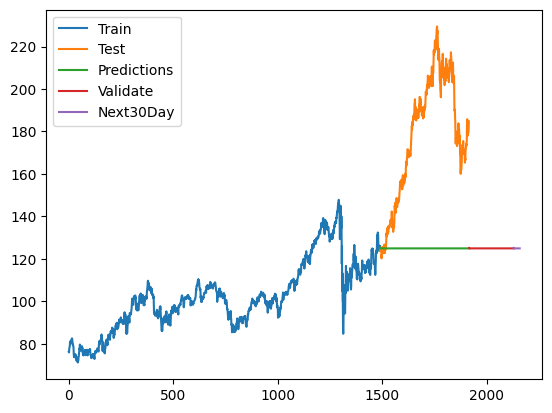

In [303]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [304]:
test_data.index

RangeIndex(start=1490, stop=1915, step=1)

##**ARE** 721

In [305]:
# Dùng thư viện yfinance để tải dataset
import pandas as pd

data =pd.read_csv('ARE.csv', index_col='Date')
data

,Close,Open,High,Low,Vol,Change%
Date,,,,,,
2/1/2015,89.79,89.11,89.88,88.54,277.62K,1.18%
5/1/2015,90.87,89.31,91.17,89.15,359.76K,1.20%
6/1/2015,91.33,90.65,91.56,90.25,1.33M,0.51%
7/1/2015,92.57,91.55,92.57,90.69,543.40K,1.36%
8/1/2015,93.63,92.57,93.85,92.43,718.78K,1.15%
...,...,...,...,...,...,...
12/6/2023,121.00,120.28,121.71,120.03,788.83K,0.34%
13/06/2023,122.06,121.15,123.93,120.50,846.11K,0.88%
14/06/2023,121.92,122.99,123.79,120.83,1.01M,-0.11%


In [306]:
# Chuyển đổi hàm để xử lý chuỗi 'Vol.'
def convert_vol(value):
    if 'K' in value:
        # Loại bỏ ký tự 'K' và chuyển đổi thành giá trị số
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        # Loại bỏ ký tự 'M' và chuyển đổi thành giá trị số
        return float(value.replace('M', '')) * 1000000
    else:
        # Trường hợp không có đơn vị, giữ nguyên giá trị
        return float(value)

# Áp dụng hàm chuyển đổi vào cột 'Vol.' của dataset
data['Vol'] = data['Vol'].apply(convert_vol)

# Chuyển đổi hàm để xử lý chuỗi 'Change %'
def convert_change(value):
    # Loại bỏ ký tự '%' và chuyển đổi thành giá trị số
    return float(value.replace('%', ''))

# Áp dụng hàm chuyển đổi bằng phương pháp map
data['Change%'] = data['Change%'].map(convert_change)
data

,Close,Open,High,Low,Vol,Change%
Date,,,,,,
2/1/2015,89.79,89.11,89.88,88.54,277620.0,1.18
5/1/2015,90.87,89.31,91.17,89.15,359760.0,1.20
6/1/2015,91.33,90.65,91.56,90.25,1330000.0,0.51
7/1/2015,92.57,91.55,92.57,90.69,543400.0,1.36
8/1/2015,93.63,92.57,93.85,92.43,718780.0,1.15
...,...,...,...,...,...,...
12/6/2023,121.00,120.28,121.71,120.03,788830.0,0.34
13/06/2023,122.06,121.15,123.93,120.50,846110.0,0.88
14/06/2023,121.92,122.99,123.79,120.83,1010000.0,-0.11


In [307]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [308]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df=data
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [309]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [310]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6212.435, Time=2.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6270.338, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6236.383, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6239.670, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6269.384, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6236.321, Time=1.00 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6237.895, Time=1.58 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6179.746, Time=3.93 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6189.937, Time=3.35 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=6169.263, Time=3.44 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=6170.217, Time=3.05 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=6170.961, Time=9.18 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=6170.507, Time=2.68 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=5.61 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : 

ARIMA(order=(5, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [311]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [312]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[167.41249633 167.89183553 167.37473921 166.94931124 167.24684416
 166.94438051 167.25119147 167.10172134 167.18437131 167.16160729
 167.13785177 167.17111972 167.13603839 167.16443965 167.14703623
 167.15583711 167.15378298 167.15177704 167.15532531 167.15165032
 167.15457028 167.15269688 167.15362894 167.15340228 167.15321008
 167.15357831 167.15319628 167.15350158 167.15330316 167.15340245]


In [313]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mae = np.mean(np.abs(y_pred - y_test))
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
valid_mape = np.mean(np.abs((y_val - y_pred_val) / np.where(y_val != 0, y_val, 1))) * 100


print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)


Validation RMSE: 30.907648007964557
Testing RMSE: 25.697123988437653
Testing MAE: 21.136326901751858
Validation MAE: 26.518612820742124
Testing MAPE: 11.059923724538963
Validation MAPE: 20.43393953901907


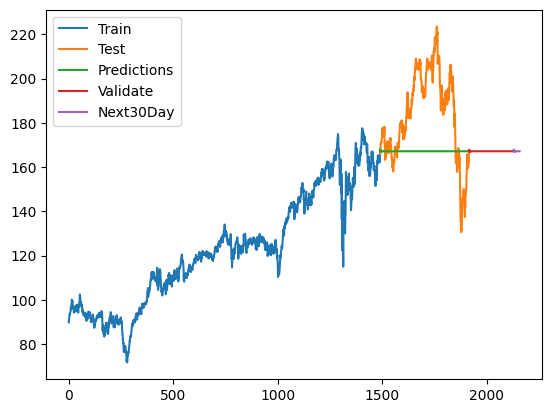

In [314]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [315]:
test_data.index

RangeIndex(start=1490, stop=1915, step=1)

## **ARI** 721


In [316]:
# Dùng thư viện yfinance để tải dataset
import pandas as pd

data =pd.read_csv('ARI.csv', index_col='Date')
data

,Close,Open,High,Low,Vol,Change%
Date,,,,,,
2/1/2015,16.54,16.49,16.55,16.35,184.56K,1.10%
5/1/2015,16.51,16.47,16.63,16.45,387.43K,-0.18%
6/1/2015,16.42,16.60,16.64,16.37,225.81K,-0.55%
7/1/2015,16.63,16.48,16.65,16.44,492.81K,1.28%
8/1/2015,16.49,16.69,16.69,16.45,440.70K,-0.84%
...,...,...,...,...,...,...
12/6/2023,11.09,10.83,11.11,10.83,754.88K,2.21%
13/06/2023,11.22,11.12,11.25,11.08,799.04K,1.17%
14/06/2023,11.19,11.27,11.38,11.09,876.19K,-0.27%


In [317]:
# Chuyển đổi hàm để xử lý chuỗi 'Vol.'
def convert_vol(value):
    if 'K' in value:
        # Loại bỏ ký tự 'K' và chuyển đổi thành giá trị số
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        # Loại bỏ ký tự 'M' và chuyển đổi thành giá trị số
        return float(value.replace('M', '')) * 1000000
    else:
        # Trường hợp không có đơn vị, giữ nguyên giá trị
        return float(value)

# Áp dụng hàm chuyển đổi vào cột 'Vol.' của dataset
data['Vol'] = data['Vol'].apply(convert_vol)

# Chuyển đổi hàm để xử lý chuỗi 'Change %'
def convert_change(value):
    # Loại bỏ ký tự '%' và chuyển đổi thành giá trị số
    return float(value.replace('%', ''))

# Áp dụng hàm chuyển đổi bằng phương pháp map
data['Change%'] = data['Change%'].map(convert_change)
data

,Close,Open,High,Low,Vol,Change%
Date,,,,,,
2/1/2015,16.54,16.49,16.55,16.35,184560.0,1.10
5/1/2015,16.51,16.47,16.63,16.45,387430.0,-0.18
6/1/2015,16.42,16.60,16.64,16.37,225810.0,-0.55
7/1/2015,16.63,16.48,16.65,16.44,492810.0,1.28
8/1/2015,16.49,16.69,16.69,16.45,440700.0,-0.84
...,...,...,...,...,...,...
12/6/2023,11.09,10.83,11.11,10.83,754880.0,2.21
13/06/2023,11.22,11.12,11.25,11.08,799040.0,1.17
14/06/2023,11.19,11.27,11.38,11.09,876190.0,-0.27


In [318]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [319]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df=data
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [320]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [321]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=361.125, Time=3.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=371.360, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=373.353, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=373.354, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=369.629, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=360.047, Time=2.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=366.964, Time=0.88 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=367.594, Time=2.92 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=361.496, Time=3.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=363.182, Time=1.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=360.631, Time=4.57 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=363.487, Time=2.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=358.290, Time=0.55 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=365.196, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=365.8

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [322]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [323]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[11.03256863 11.07661191 11.0474395  11.06676208 11.05396361 11.06244078
 11.05682586 11.06054494 11.05808158 11.05971321 11.05863249 11.05934831
 11.05887418 11.05918822 11.05898021 11.05911799 11.05902673 11.05908718
 11.05904714 11.05907366 11.0590561  11.05906773 11.05906002 11.05906513
 11.05906175 11.05906399 11.0590625  11.05906349 11.05906284 11.05906327]


In [324]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mae = np.mean(np.abs(y_pred - y_test))
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
valid_mape = np.mean(np.abs((y_val - y_pred_val) / np.where(y_val != 0, y_val, 1))) * 100


print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)


Validation RMSE: 1.204746064904291
Testing RMSE: 3.0823071209615076
Testing MAE: 2.691781836129626
Validation MAE: 0.9875921674598768
Testing MAPE: 18.62181793657017
Validation MAPE: 9.716058520227385


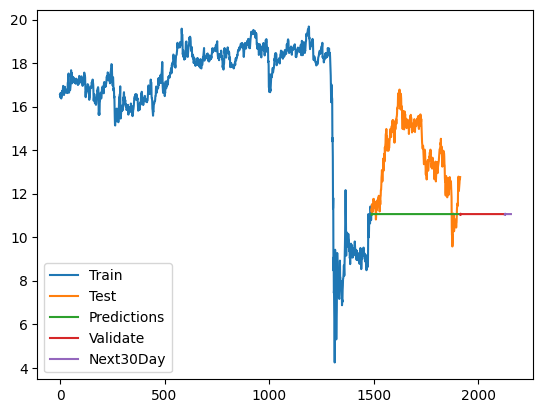

In [325]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [326]:
test_data.index

RangeIndex(start=1490, stop=1915, step=1)